PROJECT 1 : Counterfeit Medicines Sales Prediction


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [5]:
file1=r'C:\Users\Pavan\Documents\project_2\counterfeit_train.csv'
file2=r'C:\Users\Pavan\Documents\project_2\counterfeit_test.csv'

In [6]:
train=pd.read_csv(file1)
test=pd.read_csv(file2)

In [7]:
train[' '].describe()

count     6818.000000
mean      2280.583480
std       1693.354404
min        146.290000
25%        933.265600
50%       1902.670400
75%       3207.638400
max      13199.964800
Name:  , dtype: float64

In [8]:
train.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       ' '],
      dtype='object')

In [9]:
train=train.rename(columns={ ' ':'prediction'},inplace= False)

In [10]:
train.columns

Index(['Medicine_ID', 'Counterfeit_Weight', 'DistArea_ID', 'Active_Since',
       'Medicine_MRP', 'Medicine_Type', 'SidEffect_Level',
       'Availability_rating', 'Area_Type', 'Area_City_Type', 'Area_dist_level',
       'prediction'],
      dtype='object')

In [11]:
train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,prediction
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


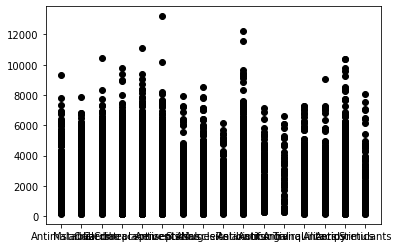

In [12]:
x=train.prediction
y=train.Medicine_Type
plt.scatter(y,x ,color="black")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


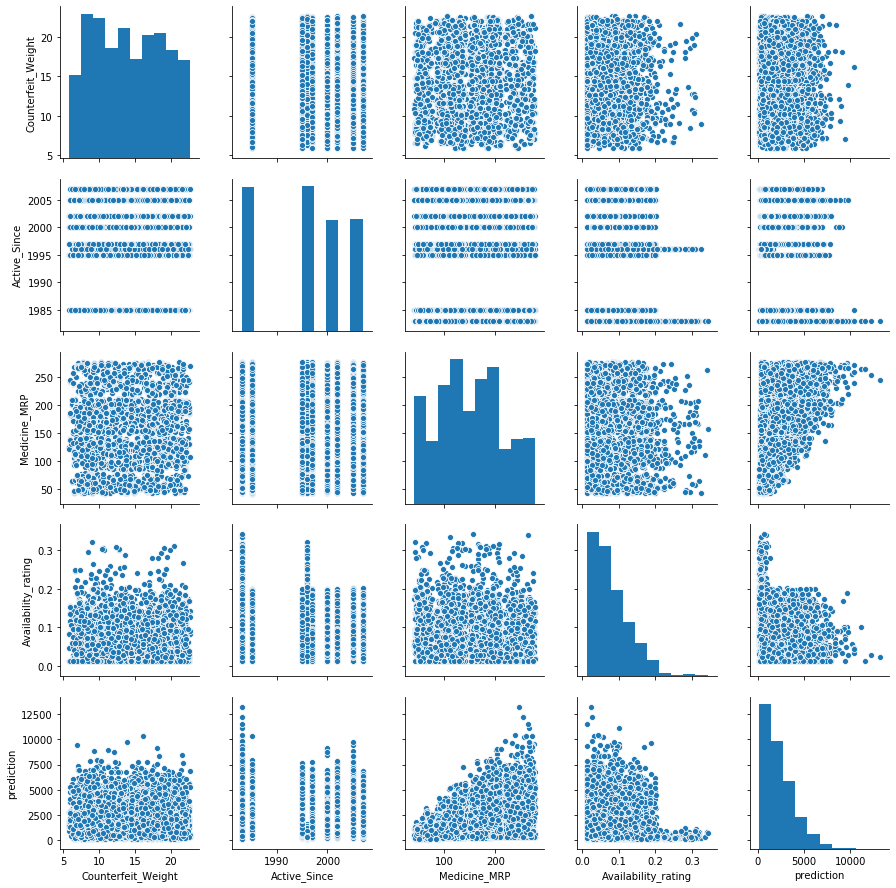

In [13]:
import seaborn as sns 
sns.pairplot(train)

In [14]:
train.Counterfeit_Weight=train.Counterfeit_Weight.fillna(train.Counterfeit_Weight.mean())

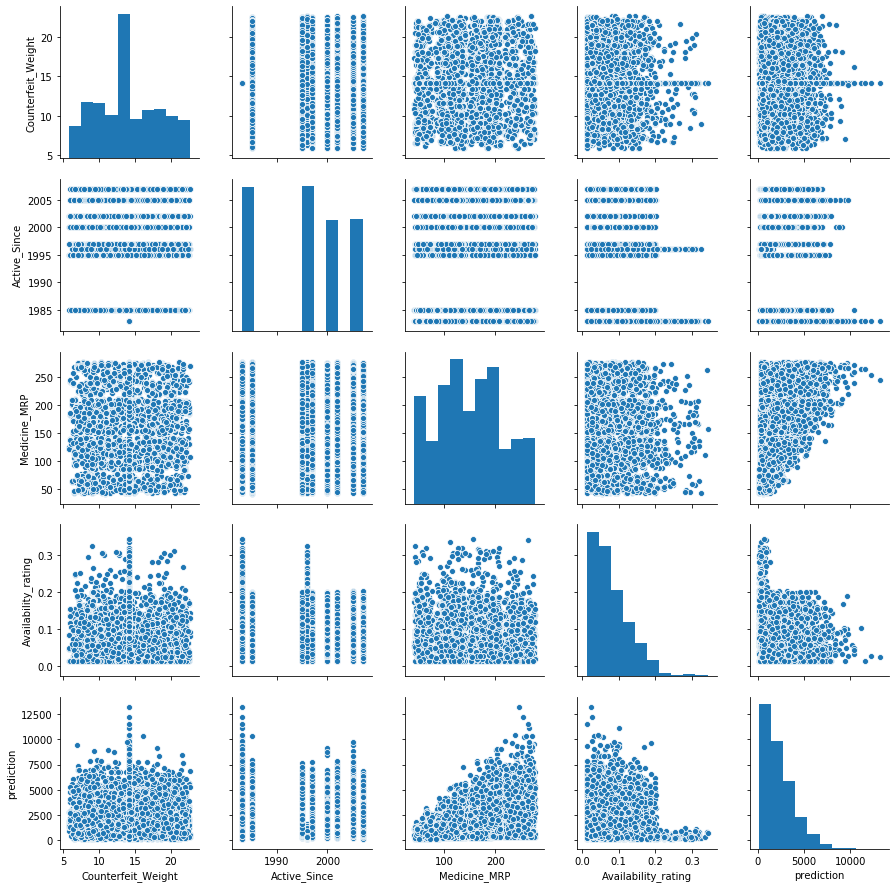

In [15]:
sns.pairplot(train)

In [19]:
train.corr().round(2)

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,prediction
Counterfeit_Weight,1.00,-0.01,0.03,-0.02,0.00
Active_Since,-0.01,1.00,0.00,-0.08,-0.04
Medicine_MRP,0.03,0.00,1.00,-0.00,0.57
Availability_rating,-0.02,-0.08,-0.00,1.00,-0.12
prediction,0.00,-0.04,0.57,-0.12,1.00


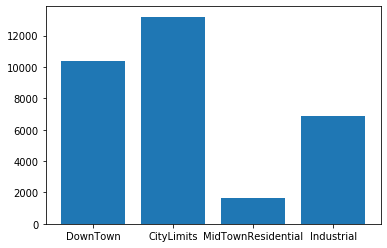

In [20]:
plt.bar(train.Area_Type ,train.prediction)
plt.show()

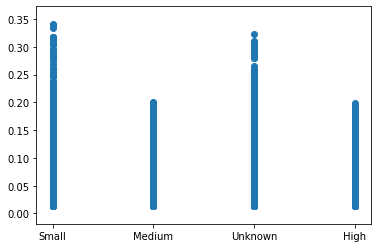

In [17]:
plt.scatter(train.Area_dist_level, train.Availability_rating)
plt.show()

In [ ]:
corr()

In [15]:
train.Area_City_Type.value_counts()

Tier 3    2655
Tier 2    2244
Tier 1    1919
Name: Area_City_Type, dtype: int64

In [16]:
#counting the each categorical value and creating thee dictionary 
train.Medicine_Type.value_counts().to_dict()

{'Hreplacements': 976,
 'Antibiotics': 970,
 'Antiseptics': 724,
 'OralContraceptives': 694,
 'Antipyretics': 536,
 'Cardiac': 522,
 'Mstablizers': 514,
 'Tranquilizers': 420,
 'Analgesics': 356,
 'Antimalarial': 339,
 'Antacids': 206,
 'Statins': 167,
 'MuscleRelaxants': 139,
 'Antifungal': 111,
 'Stimulants': 95,
 'Antiviral': 49}

In [17]:
#storing the values in key value type 
df_freaquency_map=train.Medicine_Type.value_counts().to_dict()

In [18]:
train.Medicine_Type=train.Medicine_Type.map(df_freaquency_map)

In [19]:
train.Medicine_Type.head()

0    339
1    514
2    522
3    694
4    976
Name: Medicine_Type, dtype: int64

In [20]:
train.Area_Type.value_counts()

DownTown              4481
MidTownResidential     873
CityLimits             735
Industrial             729
Name: Area_Type, dtype: int64

In [21]:
cleanup_nums = {"SidEffect_Level":     {"mild": 0.1, "critical": 0.2},
               "Area_Type": {"DownTown": 0.8 or 0.7 , "MidTownResidential" : 0.3 ,"CityLimits": 0.2 ,"Industrial":0.2 }}


In [22]:
train.replace(cleanup_nums, inplace=True)
train.head()


,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,prediction
0,RRA15,13.100000,Area046,1995,160.2366,339,0.2,0.070422,0.8,Tier 1,Small,1775.5026
1,YVV26,14.115057,Area027,1983,110.4384,514,0.1,0.013000,0.2,Tier 3,Medium,3069.1520
2,LJC15,9.025000,Area046,1995,259.4092,522,0.1,0.060783,0.8,Tier 1,Small,2603.0920
3,GWC40,11.800000,Area046,1995,99.9830,694,0.1,0.065555,0.8,Tier 1,Small,1101.7130
4,QMN13,14.115057,Area019,1983,56.4402,976,0.2,0.248859,0.3,Tier 1,Small,158.9402


In [23]:
cleanup2_nums={"Area_dist_level": {"Small":0.4,'Medium':0.3,"High":0.2,"Unknown":0.1 or 0.5 or 0.6}}

In [24]:
train.replace(cleanup2_nums, inplace=True)
train.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,prediction
0,RRA15,13.100000,Area046,1995,160.2366,339,0.2,0.070422,0.8,Tier 1,0.4,1775.5026
1,YVV26,14.115057,Area027,1983,110.4384,514,0.1,0.013000,0.2,Tier 3,0.3,3069.1520
2,LJC15,9.025000,Area046,1995,259.4092,522,0.1,0.060783,0.8,Tier 1,0.4,2603.0920
3,GWC40,11.800000,Area046,1995,99.9830,694,0.1,0.065555,0.8,Tier 1,0.4,1101.7130
4,QMN13,14.115057,Area019,1983,56.4402,976,0.2,0.248859,0.3,Tier 1,0.4,158.9402


In [25]:
train.prediction.mean()

2280.5834798474725

In [26]:
train_df=train[["Counterfeit_Weight","Active_Since","Medicine_MRP","Medicine_Type"]]

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaled=MinMaxScaler()
minmax_df = scaled.fit_transform(train_df) 
train_scaled=pd.DataFrame(minmax_df, columns=["Counterfeit_Weight","Active_Since","Medicine_MRP","Medicine_Type"])

In [28]:
train_scaled

,Counterfeit_Weight,Active_Since,Medicine_MRP,Medicine_Type
0,0.431378,0.500000,0.503175,0.312837
1,0.491816,0.000000,0.291626,0.501618
2,0.188747,0.500000,0.924472,0.510248
3,0.353974,0.500000,0.247211,0.695793
4,0.491816,0.000000,0.062236,1.000000
...,...,...,...,...
6813,0.159571,0.500000,0.689704,1.000000
6814,0.880917,0.500000,0.821241,1.000000
6815,0.842215,0.916667,0.645031,0.312837
6816,0.257517,0.708333,0.514354,0.127292


In [29]:
train_scale=train[["SidEffect_Level","Availability_rating","Area_Type","Area_dist_level"]]
x_train=pd.concat([train_scaled,train_scale],axis=1)
y_train=train[["prediction"]]

In [30]:
x_train.head()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_dist_level
0,0.431378,0.5,0.503175,0.312837,0.2,0.070422,0.8,0.4
1,0.491816,0.0,0.291626,0.501618,0.1,0.013000,0.2,0.3
2,0.188747,0.5,0.924472,0.510248,0.1,0.060783,0.8,0.4
3,0.353974,0.5,0.247211,0.695793,0.1,0.065555,0.8,0.4
4,0.491816,0.0,0.062236,1.000000,0.2,0.248859,0.3,0.4


In [31]:
y_train.head()

,prediction
0,1775.5026
1,3069.1520
2,2603.0920
3,1101.7130
4,158.9402


In [32]:
x_tr,x_ts,y_tr,y_ts=train_test_split(x_train,y_train,test_size=0.25,random_state=0)

In [33]:
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor(max_depth=20, min_samples_leaf=20,min_samples_split=18,n_estimators=10, random_state=1)
regressor.fit(x_tr,y_tr)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=18,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [34]:
y_pr=regressor.predict(x_ts)
y_pr

array([2121.02692197, 1935.76916238, 3147.08565721, ..., 1889.86785625,
       2375.74630282,  526.68499906])

In [35]:
from sklearn.metrics import r2_score
r2_score(y_ts,y_pr)

0.6052736392434472

In [36]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_ts,y_pr)

751.9496868693562

In [37]:
1-(751/1660)

0.5475903614457831

In [38]:
#test

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
0,HLZ81,NaN,Area027,1983,85.5328,Antibiotics,mild,0.112747,CityLimits,Tier 3,Medium
1,ECE94,13.45,Area045,2000,257.1460,OralContraceptives,mild,0.144446,DownTown,Tier 2,Unknown
2,SAD14,7.10,Area045,2000,98.1172,Antipyretics,mild,0.144221,DownTown,Tier 2,Unknown
3,EQV63,18.30,Area010,1996,135.3730,Tranquilizers,mild,0.100388,MidTownResidential,Tier 3,Unknown
4,AIR10,NaN,Area019,1983,112.8016,OralContraceptives,mild,0.022585,MidTownResidential,Tier 1,Small
...,...,...,...,...,...,...,...,...,...,...,...
1700,KXW10,NaN,Area027,1983,136.5704,Hreplacements,mild,0.050505,CityLimits,Tier 3,Medium
1701,CKE54,21.30,Area035,2002,57.0744,Antibiotics,critical,0.041118,DownTown,Tier 2,Small
1702,HAY13,20.40,Area017,2005,182.7422,Antiseptics,mild,0.191273,DownTown,Tier 2,Unknown
1703,ZEE32,20.00,Area018,2007,266.9672,Hreplacements,mild,0.013000,Industrial,Tier 3,Medium


In [39]:
#test.isnull().sum()

Medicine_ID              0
Counterfeit_Weight     297
DistArea_ID              0
Active_Since             0
Medicine_MRP             0
Medicine_Type            0
SidEffect_Level          0
Availability_rating      0
Area_Type                0
Area_City_Type           0
Area_dist_level          0
dtype: int64

In [40]:
#test.Counterfeit_Weight=test.Counterfeit_Weight.fillna(test.Counterfeit_Weight.mean())

In [41]:
#test.Medicine_Type.value_counts().to_dict()

{'Antibiotics': 262,
 'Hreplacements': 224,
 'Antiseptics': 186,
 'OralContraceptives': 162,
 'Antipyretics': 146,
 'Mstablizers': 134,
 'Cardiac': 127,
 'Tranquilizers': 100,
 'Analgesics': 89,
 'Antimalarial': 86,
 'Statins': 47,
 'Antacids': 45,
 'Antifungal': 37,
 'MuscleRelaxants': 30,
 'Antiviral': 15,
 'Stimulants': 15}

In [42]:
#df_test_freaquency_map=test.Medicine_Type.value_counts().to_dict()

In [43]:
#test.Medicine_Type=test.Medicine_Type.map(df_test_freaquency_map)

In [44]:
#test.Medicine_Type.head()

0    262
1    162
2    146
3    100
4    162
Name: Medicine_Type, dtype: int64

In [45]:
#cleanup_nums = {"SidEffect_Level":     {"mild": 0.1, "critical": 0.2}}

In [46]:
#test.replace(cleanup_nums, inplace=True)
#test.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
0,HLZ81,14.328604,Area027,1983,85.5328,262,0.1,0.112747,CityLimits,Tier 3,Medium
1,ECE94,13.450000,Area045,2000,257.1460,162,0.1,0.144446,DownTown,Tier 2,Unknown
2,SAD14,7.100000,Area045,2000,98.1172,146,0.1,0.144221,DownTown,Tier 2,Unknown
3,EQV63,18.300000,Area010,1996,135.3730,100,0.1,0.100388,MidTownResidential,Tier 3,Unknown
4,AIR10,14.328604,Area019,1983,112.8016,162,0.1,0.022585,MidTownResidential,Tier 1,Small


In [47]:
#cleanup2_nums={"Area_dist_level": {"Small":0.4,'Medium':0.3,"High":0.2,"Unknown":0.1 or 0.5 or 0.6},
               "Area_Type": {"DownTown": 0.8 or 0.7 , "MidTownResidential" : 0.3 ,"CityLimits": 0.2 ,"Industrial":0.2 }}

In [48]:
#test.replace(cleanup2_nums, inplace=True)
#test.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level
0,HLZ81,14.328604,Area027,1983,85.5328,262,0.1,0.112747,0.2,Tier 3,0.3
1,ECE94,13.450000,Area045,2000,257.1460,162,0.1,0.144446,0.8,Tier 2,0.1
2,SAD14,7.100000,Area045,2000,98.1172,146,0.1,0.144221,0.8,Tier 2,0.1
3,EQV63,18.300000,Area010,1996,135.3730,100,0.1,0.100388,0.3,Tier 3,0.1
4,AIR10,14.328604,Area019,1983,112.8016,162,0.1,0.022585,0.3,Tier 1,0.4


In [49]:
#test_df=test[["Counterfeit_Weight","Active_Since","Medicine_MRP","Medicine_Type"]]

In [50]:
#minmax_df_tr = scaled.fit_transform(test_df) 
#test_scaled=pd.DataFrame(minmax_df_tr, columns=["Counterfeit_Weight","Active_Since","Medicine_MRP","Medicine_Type"])

In [51]:
#test_scale=test[["SidEffect_Level","Availability_rating","Area_Type","Area_dist_level"]]
#x_test=pd.concat([test_scaled,test_scale],axis=1)

In [52]:
#x_test

,Counterfeit_Weight,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_dist_level
0,0.504531,0.000000,0.186516,1.000000,0.1,0.112747,0.2,0.3
1,0.452218,0.708333,0.914930,0.595142,0.1,0.144446,0.8,0.1
2,0.074129,0.708333,0.239930,0.530364,0.1,0.144221,0.8,0.1
3,0.740994,0.541667,0.398063,0.344130,0.1,0.100388,0.3,0.1
4,0.504531,0.000000,0.302258,0.595142,0.1,0.022585,0.3,0.4
...,...,...,...,...,...,...,...,...
1700,0.504531,0.000000,0.403145,0.846154,0.1,0.050505,0.2,0.3
1701,0.919619,0.791667,0.065724,1.000000,0.2,0.041118,0.8,0.4
1702,0.866032,0.916667,0.599122,0.692308,0.1,0.191273,0.8,0.1
1703,0.842215,1.000000,0.956616,0.846154,0.1,0.013000,0.2,0.3


In [53]:
#predictions=regressor.predict(x_test)
#predictions

array([1837.18989381, 3594.79951794, 1670.93646474, ..., 3029.82832528,
       3583.82030797, 3733.25094123])

In [54]:
df = pd.DataFrame(predictions, columns =[' ']) 
df

,
0,1837.189894
1,3594.799518
2,1670.936465
3,334.275012
4,383.289252
...,...
1700,3519.987995
1701,875.756289
1702,3029.828325
1703,3583.820308


In [55]:
#id_=test[["Medicine_ID"]]
#id_

,Medicine_ID
0,HLZ81
1,ECE94
2,SAD14
3,EQV63
4,AIR10
...,...
1700,KXW10
1701,CKE54
1702,HAY13
1703,ZEE32


In [56]:
#prediction=pd.concat([id_,df],axis=1)
#prediction.head()

,Medicine_ID,
0,HLZ81,1837.189894
1,ECE94,3594.799518
2,SAD14,1670.936465
3,EQV63,334.275012
4,AIR10,383.289252


In [57]:
#prediction.to_csv(r'C:\Users\Pavan\Documents\PROJECT 2\counterfeit_results_final.csv')

In [59]:
# IMPOERTING THE MODEL
from sklearn.externals import joblib
joblib.dump(regressor, 'sales_predicting_model.ml')

['sales_predicting_model.ml']